In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

Возьмём распределение Фишера с параметрами $d_1=5, d_2=10$

Матожидание и дисперсия:
$$\mathop{\mathbb{E}}(F) = \frac{d_2}{d_2 - 2} = 1.25$$
$$\mathop{\mathbb{D}}(F) = \frac{2{d_2}^2(d_1 + d_2 - 2)}{d_1(d_2 - 2)^2(d_2 - 4)} \approx 1.35416$$

Сгенерируем выборку размера 1000 и посмотрим на её гистограмму.
Изобразим теоретическую плотность.

In [25]:
d1, d2 = 5, 10
f_rv = sts.f(d1, d2)
sample = f_rv.rvs(1000)

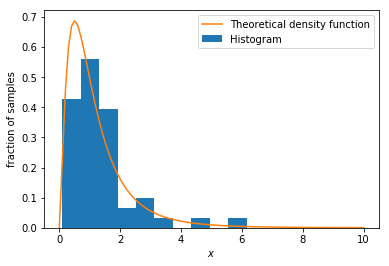

In [76]:

plt.hist(sample, normed = True, label = 'Histogram')

x = np.linspace(0, 10, 100)
pdf = f_rv.pdf(x)
plt.plot(x, pdf, label = 'Theoretical density function')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend()

In [69]:
m = 1.25
s = 1.35416

Согласно ЦПТ, у нормального распределения, приближающего распределение выборочного среднего должны быть параметры
$\mathop{\mathbb{E}}(F), (\frac{\mathop{\mathbb{D}}(F)}n)^2$


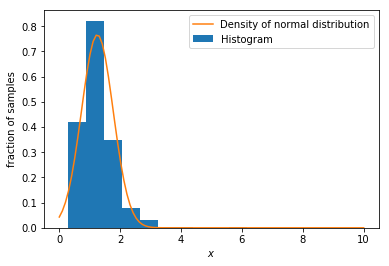

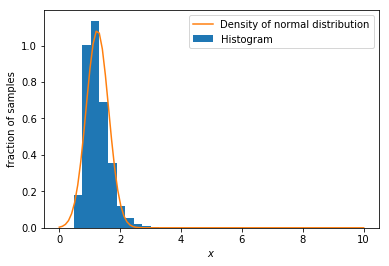

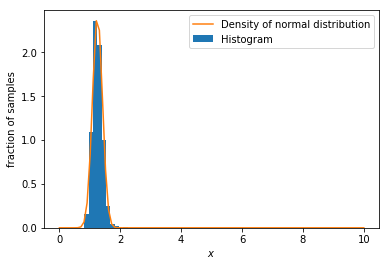

In [74]:
#Для каждого значения n построим гистограмму нашей выборки и плотность нормального распределения с
#параметрами из ЦПТ
for n in [5, 10, 50]:
    mean = []
    for i in range(1000):
        sample = f_rv.rvs(n)
        mean.append(np.mean(sample))
    plt.figure()     
    plt.hist(mean, density = True, label = 'Histogram')
    pdf = sts.norm(m, math.sqrt(s / n)).pdf
    plt.plot(x, pdf(x), label = 'Density of normal distribution')
    plt.ylabel('fraction of samples')
    plt.xlabel('$x$')
    plt.legend()

Вывод: с увеличением размера выборки распределение выброчное среднего всё лучше приближается нормальным распределением с параметрами $\mathop{\mathbb{E}}(F), (\frac{\mathop{\mathbb{D}}(F)}n)^2$.